In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from pandas import DataFrame, Panel4D, read_hdf
from glob import glob
from datetime import datetime
import time
import matplotlib
import random
import gps

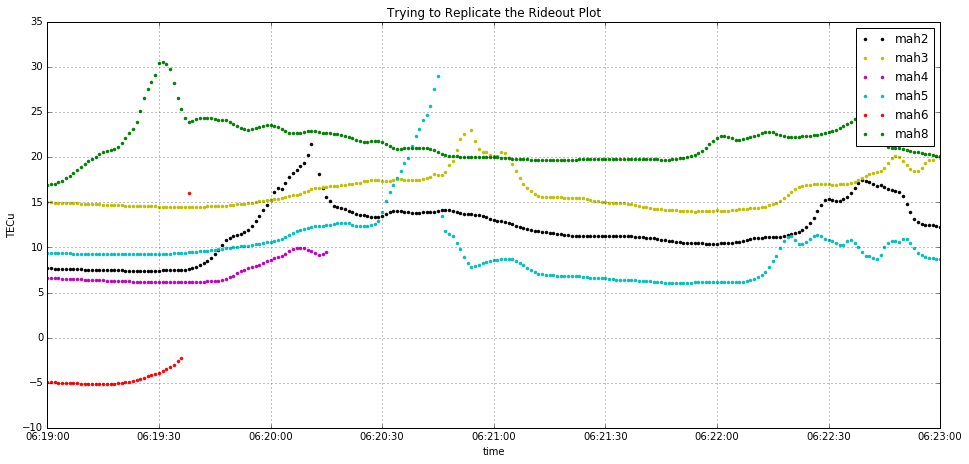

In [63]:
data = read_hdf('svn23.h5','data')
start = datetime(year=2015,month=10,day=7,hour=6,minute=19,second=0)
end = datetime(year=2015,month=10,day=7,hour=6,minute=23,second=0)

plt.figure(figsize=(16,16))
fmt = DateFormatter('%H:%M:%S')
plt.subplot(211).xaxis.set_major_formatter(fmt)
colors = ['b','g','r','c','m','y','k']
extra = [a for a in matplotlib.colors.cnames]

biasobj = gps.satelliteBias('jplg2800.15i','P1C11510.DCB',None)
bias = biasobj.dict[(23,1)]

sites = list(data.labels)
sites.remove('mah72800.15o')
sites.remove('mah92800.15o')
labs=[]
for site in sites:
    try:
        color=colors.pop()
    except:
        color=random.choice(extra)
    ranges = gps.getRangesalt(data,site)
    plots=[]
    for drange in ranges:
        tec,err = gps.getTecalt(data,site,drange)
        tec-=bias
        plots.append(tec)
    for p in plots:
        if site[:4] not in labs:
            plt.plot(p,'.',c=color,label=site[:4])
            labs.append(site[:4])
        else:
            plt.plot(p,'.',c=color,label='')
            
plt.xlim([start,end])
la = plt.legend()
plt.grid()
plt.xlabel('time')
plt.ylabel('TECu')
plt.title('Trying to Replicate the Rideout Plot')
plt.show()

This plot is very simmilar to the Rideout plot. Some of the lines match up quite closely, others not so much. I still need to hear back about the other 2 bias files, I need to explore the mapping function to turn it into vTEC, and I have to look at some of the filtering functions. I need a good way to label and color these lines!